In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

In [39]:
header = ['index', 'id', 'rate', 'generation_time', 'ingestion_time', 'commit_time']
# load the results from the 10 runs
for i in range(1, 11):
    files = glob.glob(f'results/{str(i)}/*.csv')
    df = pd.concat([pd.read_csv(f, names=header) for f in files])
    # normalize the timestamps by subtracting the minimum ingestion time
    start_time = df['generation_time'].min()
    df['generation_time'] -= start_time
    df['ingestion_time'] -= start_time
    df['commit_time'] -= start_time
    os.makedirs(f'./aggregated/{str(i)}', exist_ok=True)
    df.to_csv(f'./aggregated/{str(i)}/all.csv')

In [40]:
for i in range(1, 11):
    df = pd.read_csv(f'./aggregated/{str(i)}/all.csv')

    # group the data by id
    df = df.groupby('id').agg({'rate': 'min', 'generation_time': 'min', 'ingestion_time': 'mean', 'commit_time': 'max'})

    # add a column for the event time latency
    df['event_time_latency'] = df['commit_time'] - df['generation_time']

    # add a column for the processing time latency
    df['processing_time_latency'] = df['commit_time'] - df['ingestion_time']

    df.to_csv(f'./aggregated/{str(i)}/all.csv')

In [44]:
# load the results from the 10 runs into a single dataframe
df = pd.concat([pd.read_csv(f'./aggregated/{str(i)}/all.csv') for i in range(1, 11)])

df.to_csv('./experiment_1.csv')

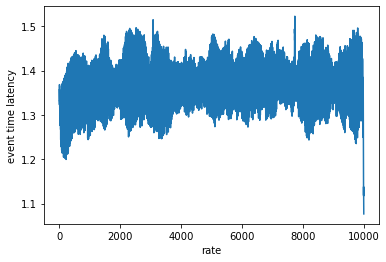

In [47]:
# remove rate lower that 10
df = df[(df['rate'] > 10)]
# group by rate and compute the average event time latency
df_grouped = df.groupby('rate')
# plot the event time latency against the rate
plt.plot(df_grouped['event_time_latency'].mean(), label='event time latency')
# plt.plot(df['rate'], df['event_time_latency'].rolling(10, min_periods=1).mean(), label='event time latency')
plt.xlabel('rate')
plt.ylabel('event time latency')
plt.show()